# Building the libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [3]:
#import the preprocess library of image

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
#rescale =  pixel value rescaling to 0 to 1 from 0 to 255
#shear_range => counter clock wise rotation(anti clock)

In [9]:
test_datagen  = ImageDataGenerator(rescale=1./255)

In [10]:
#load your images data

In [11]:
x_train = train_datagen.flow_from_directory(r"D:\IBM project\DATASET FOREST FIRES\Dataset\Dataset\train_set",target_size=(64,64),batch_size=32,class_mode="binary")

Found 436 images belonging to 2 classes.


In [12]:
x_test = test_datagen.flow_from_directory(r"D:\IBM project\DATASET FOREST FIRES\Dataset\Dataset\test_set",target_size=(64,64),batch_size=32,class_mode="binary")

Found 121 images belonging to 2 classes.


In [13]:
x_train.class_indices

{'no fire': 0, 'with fire': 1}

In [14]:
#initialize the model

In [15]:
model = Sequential()

In [16]:
#add covlution layer
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
# 32 => no of feature detectors
#(3,3)=> kernel size(feature detector size => 3*3 matrix)

In [17]:
#add maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
# you can add more convolutiona and pooling layers

In [19]:
#flatten layer => input layer to your ANN
model.add(Flatten())

In [20]:
#hidden layers

In [21]:
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))

In [22]:
model.add(Dense(units=200,kernel_initializer="random_uniform",activation="relu"))

In [23]:
#output layer

In [24]:
model.add(Dense(units=1,kernel_initializer="random_uniform",activation="sigmoid"))

In [25]:
#compile the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [26]:
#train the model

In [27]:
model.fit(x_train,steps_per_epoch=14,epochs=25,validation_data=x_test,validation_steps=4)
#steps_per_epoch = no of train images/batch size --> 436/32 = 13.625
#validation_steps = no of test images/batch size --> 121/32 = 3.78125

Epoch 1/25
14/14 [==============================] - 36s 2s/step - loss: 0.4844 - accuracy: 0.7752 - val_loss: 0.1441 - val_accuracy: 0.9587
Epoch 2/25
14/14 [==============================] - 27s 2s/step - loss: 0.2721 - accuracy: 0.8899 - val_loss: 0.0761 - val_accuracy: 0.9835
Epoch 3/25
14/14 [==============================] - 34s 2s/step - loss: 0.2422 - accuracy: 0.8899 - val_loss: 0.1310 - val_accuracy: 0.9339
Epoch 4/25
14/14 [==============================] - 34s 2s/step - loss: 0.2179 - accuracy: 0.9060 - val_loss: 0.0657 - val_accuracy: 0.9752
Epoch 5/25
14/14 [==============================] - 34s 2s/step - loss: 0.1766 - accuracy: 0.9289 - val_loss: 0.0449 - val_accuracy: 0.9835
Epoch 6/25
14/14 [==============================] - 33s 2s/step - loss: 0.1644 - accuracy: 0.9312 - val_loss: 0.0287 - val_accuracy: 0.9917
Epoch 7/25
14/14 [==============================] - 34s 3s/step - loss: 0.2290 - accuracy: 0.9037 - val_loss: 0.0469 - val_accuracy: 0.9835
Epoch 8/25
14/14 [==

In [28]:
model.save("forest_trial.h5")

# Test The Model

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [2]:
model = load_model("forest_trial.h5")

In [15]:
img = image.load_img(r"fire_test.jpg",target_size=(64,64))

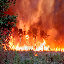

In [16]:
img

In [17]:
x = image.img_to_array(img)

In [18]:
x

array([[[ 62.,  78.,  42.],
        [  4.,  23.,   0.],
        [ 10.,  23.,  14.],
        ...,
        [112.,  47.,  41.],
        [116.,  50.,  52.],
        [112.,  53.,  55.]],

       [[  7.,   0.,   0.],
        [ 48.,  50.,  28.],
        [ 60.,  80.,  55.],
        ...,
        [110.,  45.,  43.],
        [110.,  50.,  50.],
        [124.,  59.,  55.]],

       [[ 47.,  41.,  19.],
        [ 23.,  18.,   0.],
        [ 34.,  38.,  23.],
        ...,
        [108.,  43.,  41.],
        [116.,  47.,  42.],
        [122.,  57.,  51.]],

       ...,

       [[ 44.,  40.,  28.],
        [ 73.,  43.,  51.],
        [ 71.,  58.,  50.],
        ...,
        [ 64.,  32.,  33.],
        [ 76.,  52.,  50.],
        [ 77.,  46.,  43.]],

       [[ 47.,  24.,  18.],
        [ 61.,  38.,  46.],
        [ 87.,  69.,  65.],
        ...,
        [ 75.,  60.,  65.],
        [ 80.,  52.,  51.],
        [ 78.,  55.,  47.]],

       [[ 56.,  24.,  25.],
        [ 77.,  51.,  60.],
        [ 55.,  

In [19]:
x.shape

(64, 64, 3)

In [20]:
#(1,64,64,3) to expand the dims

In [21]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [22]:
pred_prob = model.predict(x)

1/1 [==============================] - 0s 56ms/step


In [23]:
pred_prob

array([[1.]], dtype=float32)

In [24]:
if(pred_prob[0]==0):
    print('No fire is Detected')
else:
    print('Fire is Detected !')

Fire is Detected !
